In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

PART-A

1

Dataset shape: (104651, 28)
First 10 rows of the dataset:


C:\Users\ammad\AppData\Local\Temp\ipykernel_2656\2854931397.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("listings_airbnb.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,price_clean,price_dirty
0,14742560,Classic Artist Loft,97210996539,verified,Josh,Brooklyn,Columbia St,40.68626,-74.00141,United States,...,9.0,6/26/2019,0.38,5.0,1.0,74.0,Please note that we are a no smoking environme...,NaN,616.0,$616.00
1,55508928,Étage au sein d’un duplex à Brooklyn,33249221187,unconfirmed,Sophie & Grégoire,Brooklyn,Clinton Hill,40.68227,-73.96486,United States,...,9.0,6/30/2019,0.89,2.0,1.0,17.0,#NAME?,NaN,1095.0,$1095.00
2,30561537,AMAZING view in ultra luxury midtown apartment!,63109258528,verified,May,Manhattan,Hell's Kitchen,40.75275,-73.99330,United States,...,28.0,2/17/2022,3.64,4.0,6.0,334.0,NaN,NaN,969.0,969.0
3,13914662,Harlem Home Away from Home!,42768739399,verified,Arielle,Manhattan,Harlem,40.82843,-73.94672,United States,...,4.0,6/25/2019,0.16,1.0,1.0,0.0,No pets. No smoking. Please :),NaN,778.0,778.0
4,9063811,Cozy Loft in Flushing,41428819097,verified,Erjon,Queens,Flushing,40.75485,-73.82138,United States,...,1.0,3/25/2016,0.02,1.0,1.0,368.0,No smoking please. Sorry but no pets. No drink...,NaN,815.0,Rs 130400
5,22883462,Real Brooklyn Apt on Pacific and New York,1508400733,unconfirmed,Matt,Brooklyn,Crown Heights,40.67683,-73.94702,United States,...,2.0,2/1/2019,0.32,4.0,1.0,220.0,Check-in time can sometimes be flexible and we...,NaN,172.0,Rs 27520
6,38229670,"Prime, Spacious West Village Apartment",22981236558,verified,Jordan,Manhattan,Greenwich Village,40.73129,-74.00097,United States,...,61.0,4/5/2020,1.95,4.0,1.0,0.0,NaN,NaN,1181.0,$1181.00
7,26509864,"PRIVATE, NEWLY RENOVATED BEDROOM, 10 MINS FROM...",82159107182,unconfirmed,Mina,Queens,Howard Beach,40.66635,-73.85258,United States,...,3.0,7/6/2019,2.14,2.0,4.0,329.0,NaN,NaN,320.0,£256.00
8,55141648,Bright Williamsburg room with huge private ter...,40990182521,unconfirmed,Ben,Brooklyn,Williamsburg,40.71247,-73.94548,United States,...,2.0,9/5/2018,0.18,5.0,1.0,0.0,#NAME?,NaN,986.0,£788.80
9,9103577,Charming Prewar Upper West Side Apt,87433243922,verified,Daniel,Manhattan,Upper West Side,40.79828,-73.97166,United States,...,0.0,NaN,NaN,1.0,1.0,95.0,NaN,NaN,714.0,$714.00



Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104651 entries, 0 to 104650
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              104651 non-null  int64  
 1   NAME                            104397 non-null  object 
 2   host id                         104651 non-null  int64  
 3   host_identity_verified          104354 non-null  object 
 4   host name                       104233 non-null  object 
 5   neighbourhood group             104621 non-null  object 
 6   neighbourhood                   104635 non-null  object 
 7   lat                             104643 non-null  float64
 8   long                            104643 non-null  float64
 9   country                         104110 non-null  object 
 10  country code                    104517 non-null  object 
 11  instant_bookable                104543 non-null  object 

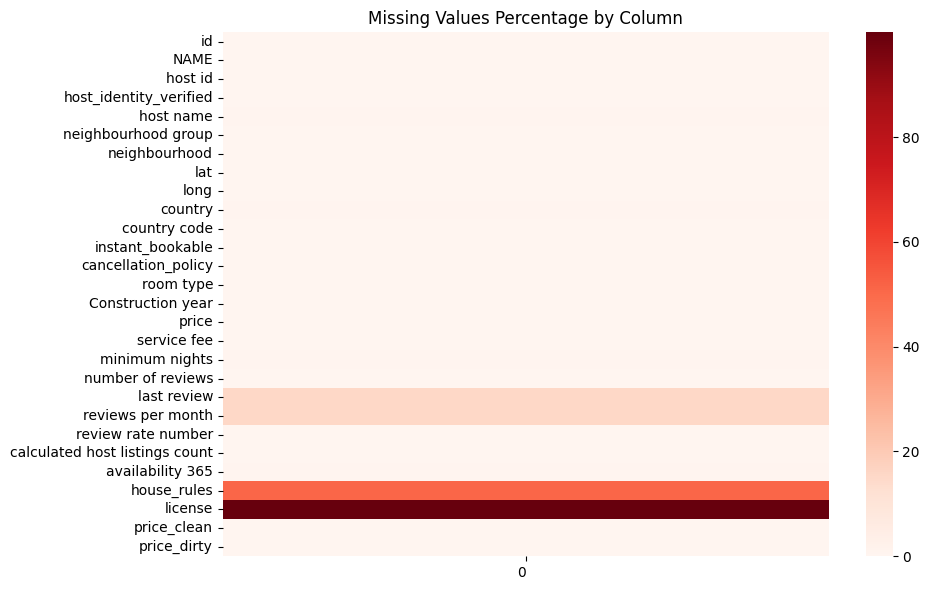

In [37]:
# Load data from a CSV file
df = pd.read_csv("listings_airbnb.csv")

 # Print shape
print(f"Dataset shape: {df.shape}")

# Display the first 10 rows of the dataframe
from IPython.display import display
print("First 10 rows of the dataset:")
display(df.head(10))

#Check for info of columns in the dataframe
print("\nInfo of the dataset:")
print(df.info())

#Percentages of missing values in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)

#visulaize percentages with heamtap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_percentages.to_frame(), cmap="Reds",)
#sns.heatmap(missing_percentages.to_frame(), cmap="Reds", annot=True, cbar=True)
plt.title("Missing Values Percentage by Column")
plt.yticks(rotation=0)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


2

In [38]:

display(df[["price_dirty","price","price_clean"]].sample(10))
#as price_clean is the actual price and is in float so removing others 2
df.drop(columns=['price_dirty',"price"], inplace=True)

,price_dirty,price,price_clean
18847,£540.80,$676,676.0
74590,€535.50,$595,595.0
93078,€288.90,$321,321.0
95069,Rs 91840,$574,574.0
68810,€343.80,$382,382.0
76866,719.0,$719,719.0
74608,£720.00,$900,900.0
84908,€821.70,$913,913.0
47236,€376.20,$418,418.0
67886,$463.00,$463,463.0


In [39]:
#date_formatting
#rint("\nSample 'last review' values before conversion:")
#display(df["last review"].sample(10))

df['last review_date'] = pd.to_datetime(df['last review'], errors='coerce', dayfirst=False)

print("\nSample 'last review' values after conversion:")
display(df[["last review_date","last review"]].sample(10))

df.drop(columns=['last review'], inplace=True)


Sample 'last review' values after conversion:


,last review_date,last review
11390,2019-06-09,6/9/2019
97586,2018-07-22,7/22/2018
49546,2022-01-12,1/12/2022
67591,2019-07-07,7/7/2019
10889,NaT,NaN
77600,2022-01-09,1/9/2022
65712,2017-11-25,11/25/2017
26900,2019-07-01,7/1/2019
88198,2021-10-16,10/16/2021
58020,2019-06-24,6/24/2019


In [40]:
import re

#this method will help us to identify the pattern used in the currency format
def extract_currency_pattern(x):
    return re.sub(r"\d", "0", str(x))  # replace digits with 0 to see format

patterns = df["service fee"].apply(extract_currency_pattern)
print(patterns.value_counts()   )

#so shown that the format used in it is $0.00
#now we have to convert service fee to proper float values

df["service fee_cleaned"] = (
    df["service fee"]
    .str.replace(r"[^\d.,]", "", regex=True)   # remove symbols & letters
    .str.replace(",", "")                      # remove thousand separators
)

df["service fee_cleaned"] = pd.to_numeric(df["service fee_cleaned"], errors="coerce")

display(df[["service fee","service fee_cleaned"]].sample(10))

df.drop(columns=["service fee"], inplace=True)


service fee
$000     63824
$00      40551
nan        276
Name: count, dtype: int64


,service fee,service fee_cleaned
93265,$210,210.0
36380,$191,191.0
78003,$24,24.0
28246,$150,150.0
13789,$200,200.0
64172,$238,238.0
92684,$181,181.0
49408,$79,79.0
50712,$177,177.0
84925,$157,157.0


In [41]:
#text casing
cols = df.select_dtypes(include=['object']).columns

for col in cols:
    df[col] = df[col].astype(str).str.strip().str.upper().replace(["nan","NAN", "NaN", "None", "NONE"], pd.NA)
   
print("\nSample text columns after casing:")
display(df[cols].sample(10))



Sample text columns after casing:


,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,house_rules,license
33807,UPPER WEST SIDE STUDIO FOR EXTENDED STAY,VERIFIED,BRENDON,MANHATTAN,UPPER WEST SIDE,UNITED STATES,US,TRUE,FLEXIBLE,ENTIRE HOME/APT,<NA>,<NA>
27828,PRIVATE ROOM IN BROOKLYN - CLOSE TO SUBWAY!,VERIFIED,JASON,BROOKLYN,BEDFORD-STUYVESANT,UNITED STATES,US,TRUE,MODERATE,PRIVATE ROOM,<NA>,<NA>
10653,HARLEM/MORNING SIDE HEIGHTS/SOHA,VERIFIED,AMY,MANHATTAN,HARLEM,UNITED STATES,US,FALSE,STRICT,PRIVATE ROOM,NO PETS THAT SHED; IF YOU HAVE A HYPO-ALLERGEN...,<NA>
24121,"ARTSY, COZY ROOM IN BED-STUY",VERIFIED,MAGGIE,BROOKLYN,BEDFORD-STUYVESANT,UNITED STATES,US,TRUE,STRICT,PRIVATE ROOM,NO PETS,<NA>
75566,COZY TRUE 1BR APARTMENT IN NOHO/EAST VILLAGE,UNCONFIRMED,STEVEN,MANHATTAN,EAST VILLAGE,UNITED STATES,US,TRUE,STRICT,ENTIRE HOME/APT,<NA>,<NA>
100222,CUTE ONE-BEDROOM APARTMENT WITH EXPOSED BRICK,VERIFIED,<NA>,BROOKLYN,CROWN HEIGHTS,UNITED STATES,US,TRUE,STRICT,ENTIRE HOME/APT,<NA>,<NA>
27526,NICE & LOVELY ROOM IN LIC.5 STOPS TO TIMES SQUARE,VERIFIED,KARMA,QUEENS,SUNNYSIDE,UNITED STATES,US,TRUE,MODERATE,PRIVATE ROOM,NO SMOKING. NO PETS. GUEST MUST BE ABLE TO P...,<NA>
58387,BRIGHT ROOM 20-203,VERIFIED,SHIMIN,BROOKLYN,SUNSET PARK,UNITED STATES,US,FALSE,MODERATE,PRIVATE ROOM,<NA>,<NA>
50742,UPPER EAST SIDE 1-BEDROOM,VERIFIED,KAREN,MANHATTAN,UPPER EAST SIDE,UNITED STATES,US,FALSE,MODERATE,ENTIRE HOME/APT,<NA>,<NA>
38930,PRISTINE BEDROOM IN HISTORIC HARLEM NEIGHBORHOOD,UNCONFIRMED,MELANI,MANHATTAN,HARLEM,UNITED STATES,US,TRUE,FLEXIBLE,PRIVATE ROOM,INFORMATION FOR YOUR STAY AT 46 MONUMENT AVENU...,<NA>


3

In [42]:
for col in df.columns:
    print(df[col].apply(lambda x: type(x)).value_counts())
    print("-----")

id
<class 'int'>    104651
Name: count, dtype: int64
-----
NAME
<class 'str'>                            104397
<class 'pandas._libs.missing.NAType'>       254
Name: count, dtype: int64
-----
host id
<class 'int'>    104651
Name: count, dtype: int64
-----
host_identity_verified
<class 'str'>                            104354
<class 'pandas._libs.missing.NAType'>       297
Name: count, dtype: int64
-----
host name
<class 'str'>                            104225
<class 'pandas._libs.missing.NAType'>       426
Name: count, dtype: int64
-----
neighbourhood group
<class 'str'>                            104621
<class 'pandas._libs.missing.NAType'>        30
Name: count, dtype: int64
-----
neighbourhood
<class 'str'>                            104635
<class 'pandas._libs.missing.NAType'>        16
Name: count, dtype: int64
-----
lat
<class 'float'>    104651
Name: count, dtype: int64
-----
long
<class 'float'>    104651
Name: count, dtype: int64
-----
country
<class 'str'>                   

4

In [43]:
#Percentages of missing values in each column
print("before")
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)

for index in missing_percentages.index:
    if missing_percentages[index]>40:
       df.drop(columns=[index], inplace=True)
       
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


for col in df.select_dtypes(include=['number']).columns:
    skewness=df[col].skew()
    if abs(skewness) < 0.5:
        #mean imputation because skewness is less
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        #median imputation because skewness is more
        df[col].fillna(df[col].median(), inplace=True)

#Percentages of missing values in each column
print("after")
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)


before

Percentage of missing values in each column:
id                                 0.000000
NAME                               0.242711
host id                            0.000000
host_identity_verified             0.283800
host name                          0.407067
neighbourhood group                0.028667
neighbourhood                      0.015289
lat                                0.007644
long                               0.007644
country                            0.516956
country code                       0.128045
instant_bookable                   0.103200
cancellation_policy                0.074533
room type                          0.000000
Construction year                  0.207356
minimum nights                     0.398467
number of reviews                  0.177734
reviews per month                 15.472380
review rate number                 0.318200
calculated host listings count     0.310556
availability 365                   0.437645
house_rules            

C:\Users\ammad\AppData\Local\Temp\ipykernel_2656\2212299866.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


after

Percentage of missing values in each column:
id                                 0.000000
NAME                               0.000000
host id                            0.000000
host_identity_verified             0.000000
host name                          0.000000
neighbourhood group                0.000000
neighbourhood                      0.000000
lat                                0.000000
long                               0.000000
country                            0.000000
country code                       0.000000
instant_bookable                   0.000000
cancellation_policy                0.000000
room type                          0.000000
Construction year                  0.000000
minimum nights                     0.000000
number of reviews                  0.000000
reviews per month                  0.000000
review rate number                 0.000000
calculated host listings count     0.000000
availability 365                   0.000000
price_clean             

C:\Users\ammad\AppData\Local\Temp\ipykernel_2656\2212299866.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\ammad\AppData\Local\Temp\ipykernel_2656\2212299866.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

5

In [44]:
list_happiness_csvs=["2015.csv","2016.csv","2017.csv","2018.csv","2019.csv"]
df_list = []
for csv in list_happiness_csvs:
    temp= pd.read_csv(csv)
    temp["year"] = csv.split(".")[0]
    #print(df.columns)
    df_list.append(temp)

happiness_df = pd.concat(df_list, ignore_index=True,axis=0)

display(happiness_df.sample(10))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
448,Burkina Faso,NaN,NaN,NaN,NaN,NaN,1.043280,NaN,0.324368,NaN,...,0.120328,1.727213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,118.0,Guinea,4.534,0.380,0.829,0.375,0.332,0.086
73,Indonesia,Southeastern Asia,74.0,5.399,0.02596,0.82827,1.087080,0.63793,0.466110,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,Uganda,NaN,NaN,NaN,NaN,NaN,1.129828,NaN,0.443186,NaN,...,0.057070,1.526363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,Kosovo,Central and Eastern Europe,77.0,5.401,NaN,0.90145,0.660620,0.54000,0.143960,0.06547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,125.0,Bangladesh,4.456,0.562,0.928,0.723,0.527,0.143
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,150.0,Syria,3.462,0.689,0.382,0.539,0.088,0.144
760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,135.0,Swaziland,4.212,0.811,1.149,0.000,0.313,0.135
89,Philippines,Southeastern Asia,90.0,5.073,0.04934,0.70532,1.035160,0.58114,0.625450,0.12279,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,142.0,Comoros,3.973,0.274,0.757,0.505,0.142,0.078


B

In [45]:
from scipy import stats
import pprint

columns_to_analyze = ['price_clean', 'service fee_cleaned', 'minimum nights']

print("Summary Statistics:")
print(df[columns_to_analyze].describe())
print("Skewness:")
print(df[columns_to_analyze].skew())

Summary Statistics:
         price_clean  service fee_cleaned  minimum nights
count  104651.000000        104651.000000   104651.000000
mean      625.318342           125.030860        8.106019
std       331.206975            66.225902       30.272819
min        50.000000            10.000000    -1223.000000
25%       340.500000            68.000000        2.000000
50%       625.318342           125.000000        3.000000
75%       912.000000           182.000000        5.000000
max      1200.000000           240.000000     5645.000000
Skewness:
price_clean             0.001019
service fee_cleaned     0.001665
minimum nights         87.068875
dtype: float64


1

for minimum rights we be using z-score while for minimum nights we would be using IQR

In [46]:

columns_to_analyze_zscore = ['price_clean', 'service fee_cleaned']

def detect_outliers_zscore(data, column, threshold=3):
    # Remove NaN values for calculation
    clean_data = data[column].dropna()
    
    z_scores = np.abs(stats.zscore(clean_data))
    outlier_indices = clean_data[z_scores > threshold].index
    outliers = data.loc[outlier_indices]
    
    return outliers, threshold

zscore_results = {}
for col in columns_to_analyze_zscore:
    outliers, threshold = detect_outliers_zscore(df, col, threshold=3)
    zscore_results[col] = {
        'threshold': threshold,
        'count': len(outliers)
    }

pprint.pprint(zscore_results)

#Hence no outliers for price_clean and service fee_cleaned


{'price_clean': {'count': 0, 'threshold': 3},
 'service fee_cleaned': {'count': 0, 'threshold': 3}}


In [47]:
columns_to_analyze_iqr = ['minimum nights']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

iqr_results = {}
for col in columns_to_analyze_iqr:
    outliers, lower, upper, q1, q3, iqr = detect_outliers_iqr(df, col)
    iqr_results[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'count': len(outliers)
    }
    
pprint.pprint(iqr_results)



{'minimum nights': {'IQR': np.float64(3.0),
                    'Q1': np.float64(2.0),
                    'Q3': np.float64(5.0),
                    'count': 18750,
                    'lower_bound': np.float64(-2.5),
                    'upper_bound': np.float64(9.5)}}


2

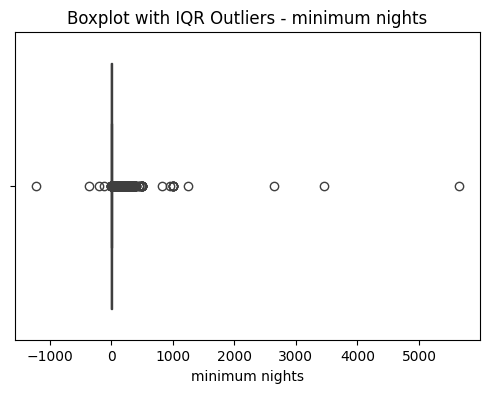

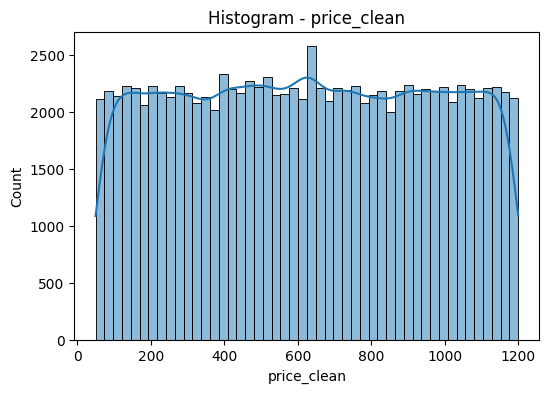

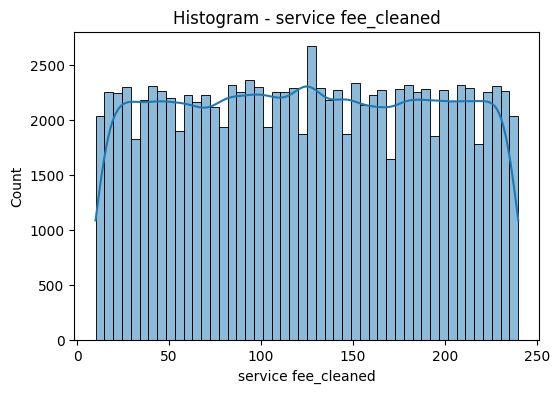

In [48]:
for col in columns_to_analyze_iqr:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot with IQR Outliers - {col}')
    plt.show()
    
for col in columns_to_analyze_zscore:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram - {col}')
    plt.show()

3

As "price_clean and service fee_cleaned" have no outliers so no tirmming or capping
But "minimum nights" has many outliers so trimming is not a good option, we would rather be using capping for it

After Capping Outliers in 'minimum nights':


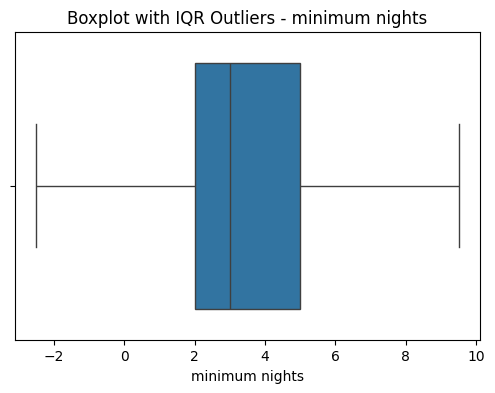

In [49]:
l_bound = iqr_results['minimum nights']['lower_bound']
u_bound = iqr_results['minimum nights']['upper_bound']
df['minimum nights'] = df['minimum nights'].clip(lower=l_bound, upper=u_bound)

print("After Capping Outliers in 'minimum nights':")
for col in columns_to_analyze_iqr:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot with IQR Outliers - {col}')
    plt.show()

PART C

1

In [50]:
#aggregation on country level
agg_df=df.groupby("country").agg( avg_price=('price_clean','mean'), avg_reviews=('review rate number','mean')  ).reset_index()
print(agg_df)


#doing it beacuse in airbnb dataset i did it for text casing
happiness_df["Country"]=happiness_df["Country"].astype(str).str.strip().str.upper().replace(["NAN","NaN","nan","None","NONE"], pd.NA)
#display(happiness_df.sample(10))
    
    
#merging two datasets on country
merged_df = pd.merge(agg_df, happiness_df, left_on='country', right_on='Country', how='inner')
    
display(merged_df)
    

         country   avg_price  avg_reviews
0  UNITED STATES  625.318342     3.279702


,country,avg_price,avg_reviews,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,UNITED STATES,625.318342,3.279702,UNITED STATES,North America,15.0,7.119,0.03839,1.39451,1.247110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UNITED STATES,625.318342,3.279702,UNITED STATES,North America,13.0,7.104,NaN,1.50796,1.047820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNITED STATES,625.318342,3.279702,UNITED STATES,NaN,NaN,NaN,NaN,NaN,1.419921,...,0.135639,2.218113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2

So no correlation found between average price and happiness score

In [51]:
print(merged_df[["avg_price","Happiness Score"]].corr())

#So no correlation found between average price and happiness score
#also indicates that avg_price has not variance at all


                 avg_price  Happiness Score
avg_price              NaN              NaN
Happiness Score        NaN              1.0


3

In [52]:
from sklearn.preprocessing import StandardScaler
#nomrally standard scalar is used, because we have already terminated outliers and min max is mostly useful for neural networks 
numeric_features = df.select_dtypes(include=['number']).columns

for col in numeric_features:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    
    
display(df.sample(10))

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price_clean,last review_date,service fee_cleaned
57781,-1.438403,BEAUTIFUL BROOKLYN BROWNSTONE WITH LOTS OF LIGHT,-0.801282,UNCONFIRMED,HELEN,BROOKLYN,BEDFORD-STUYVESANT,-0.751679,-0.175218,UNITED STATES,...,0.784003,-0.605748,-0.231648,0.261035,-0.997499,-0.21488,1.893485,0.479103,2019-07-07,0.482731
9182,1.103338,"HUGE HISTORICAL 1 BEDROOM IN SOUTH PARK SLOPE, BK",1.106332,VERIFIED,DEREK,BROOKLYN,SUNSET PARK,-1.176430,-0.893510,UNITED STATES,...,-0.778342,-0.277133,-0.454360,-0.645355,-0.997499,-0.21488,-0.429265,-1.558907,2019-04-07,-1.555756
84809,-1.730016,BEAUTIFUL SUNNY PARK SLOPE BROOKLYN,0.038490,VERIFIED,ALINA,BROOKLYN,SOUTH SLOPE,-1.168200,-0.606031,UNITED STATES,...,1.304785,-0.277133,-0.251895,-0.546701,-0.997499,-0.21488,-0.799130,-0.770876,2019-05-27,-0.770561
92931,0.216267,"SPACIOUS, PRIVATE APARTMENT BY COLUMBIA UNIVER...",1.189735,VERIFIED,FERNANDO,MANHATTAN,MORNINGSIDE HEIGHTS,1.583024,-0.203077,UNITED STATES,...,1.651973,0.708712,-0.373374,-0.614526,-0.997499,-0.21488,-1.043241,0.835378,2022-01-14,0.830029
2036,0.688039,SUNNY 1 BEDROOM IN THE HEART OF NYC,-0.800225,UNCONFIRMED,PK,MANHATTAN,MURRAY HILL,0.371033,-0.458255,UNITED STATES,...,1.478379,-0.605748,0.193530,-0.460378,-0.997499,-0.21488,1.649374,-0.121732,2018-12-08,-0.121265
34390,1.523223,YOUR SPECIAL PLACE IN MANHATTAN BACK ROOM,-0.712576,VERIFIED,ELENA,MANHATTAN,WASHINGTON HEIGHTS,1.890406,0.157885,UNITED STATES,...,-1.472717,-0.934364,-0.191155,0.063725,1.340933,-0.05968,-0.377484,0.657241,2019-06-02,0.663930
17826,0.077426,LUXURY 1 BDRM APT IN CLINTON HILLS.,-0.928407,VERIFIED,KATHLEEN,BROOKLYN,CLINTON HILL,-0.703013,-0.290694,UNITED STATES,...,-1.125529,-0.277133,4.485802,1.309241,-0.997499,-0.21488,0.340053,-0.170041,2022-02-18,-0.166565
41647,-0.502945,MODEM 2 BEDROOM IN TIMES SQ FOR 5PPL,-1.644821,VERIFIED,LICA,MANHATTAN,HELL'S KITCHEN,0.646209,-0.804480,UNITED STATES,...,-1.125529,-0.934364,0.638955,3.208344,1.340933,-0.21488,0.288272,-0.133809,2019-06-29,-0.136365
53216,1.548946,"SUNNY BEDROOM, NEW RENOVATED BROOKLYN HOUSE",-0.254563,VERIFIED,SELIN,BROOKLYN,PROSPECT-LEFFERTS GARDENS,-1.248534,-0.041775,UNITED STATES,...,1.131191,1.858866,-0.494853,-0.633024,0.561456,-0.21488,-1.043241,1.735122,2018-07-22,1.736023
97433,-1.416622,"PERFECT: TIMES SQU., BROADWAY CNTPRK, BARS, EATS,",1.569773,UNCONFIRMED,BRONSON & SAM,MANHATTAN,HELL'S KITCHEN,0.669826,-0.794386,UNITED STATES,...,-0.604748,-0.605748,1.489310,0.489174,-0.218022,-0.18384,1.316496,0.672337,2018-12-01,0.679030


4

In [ ]:
#one hot encoding for room-type
df = pd.get_dummies(df, columns=['room type'])


from sklearn.preprocessing import LabelEncoder

# Initialize
le = LabelEncoder()

# Fit the encoder and transform in one step
df["neighbourhood group"] = le.fit_transform(df["neighbourhood group"])  # Note the single brackets


5
listing_age = 2025 - Construction_year  # or current year
annual_revenue = price_clean * availability_365 #annual revinue


In [54]:
current_year = 2025

df["listing_age"] = current_year - df["Construction year"]
df["annual_revenue"] = df["price_clean"] * df["availability 365"]



PART-D

1

In [ ]:
from rapidfuzz import process, fuzz
# Threshold for fuzzy matching (0-100)
threshold = 90

# Detect near-duplicates based on NAME
duplicates = set()
names = df["NAME"].tolist()

for i, name in enumerate(names):
    if i in duplicates:
        continue
    matches = process.extract(
        query=name,
        choices=names,
        scorer=fuzz.ratio,
        score_cutoff=threshold
    )
    for match_name, score, j in matches:
        if i != j:
            duplicates.add(j)

# Drop duplicates
df_cleaned = df.drop(index=duplicates).reset_index(drop=True)

print(df_cleaned)



KeyboardInterrupt: 

2
Have done it already in Part-A

3

In [57]:
numeric_airbnb_df=df.select_dtypes(include=['number'])

display(numeric_airbnb_df.corr())

,id,host id,neighbourhood group,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price_clean,service fee_cleaned,listing_age,annual_revenue
id,1.000000,-0.000989,0.008693,-0.008977,0.041578,0.001476,0.027505,-0.041721,0.040254,0.036376,0.024044,-0.138560,0.006823,0.007185,-0.001476,0.000353
host id,-0.000989,1.000000,0.002574,0.001024,-0.007934,0.004820,0.000198,-0.004704,-0.002766,0.003404,0.001730,-0.002438,0.003467,0.003268,-0.004820,0.005466
neighbourhood group,0.008693,0.002574,1.000000,0.296907,0.021649,-0.004532,0.028289,-0.005618,0.030052,0.012172,0.112988,0.050738,-0.001690,-0.001236,0.004532,-0.003193
lat,-0.008977,0.001024,0.296907,1.000000,0.074366,0.005099,0.036075,-0.024624,-0.020992,-0.003496,0.032165,-0.005492,-0.005788,-0.005801,-0.005099,0.001665
long,0.041578,-0.007934,0.021649,0.074366,1.000000,0.000679,-0.108753,0.068456,0.116801,0.014941,-0.103941,0.059063,0.003789,0.003635,-0.000679,0.000343
Construction year,0.001476,0.004820,-0.004532,0.005099,0.000679,1.000000,-0.002638,0.001707,0.003659,0.004662,-0.002658,-0.008096,-0.004768,-0.004463,-1.000000,0.005312
minimum nights,0.027505,0.000198,0.028289,0.036075,-0.108753,-0.002638,1.000000,-0.159654,-0.285152,0.009378,0.199141,0.084678,-0.003299,-0.003343,0.002638,-0.003858
number of reviews,-0.041721,-0.004704,-0.005618,-0.024624,0.068456,0.001707,-0.159654,1.000000,0.601005,-0.018379,-0.080716,0.098962,0.005311,0.005175,-0.001707,0.009242
reviews per month,0.040254,-0.002766,0.030052,-0.020992,0.116801,0.003659,-0.285152,0.601005,1.000000,0.034575,-0.030256,0.072443,0.004296,0.004175,-0.003659,0.007306
review rate number,0.036376,0.003404,0.012172,-0.003496,0.014941,0.004662,0.009378,-0.018379,0.034575,1.000000,0.024406,-0.006379,-0.004717,-0.004507,-0.004662,-0.001260


In [ ]:
4

In [58]:
categorical_df=df.select_dtypes(include=['object'])

display(categorical_df.sample(10))

for col in categorical_df.columns:
    print(f"Value counts for column: {col}")
    print(categorical_df[col].value_counts())
    print("-----")

,NAME,host_identity_verified,host name,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type
1697,"ONE OF A KIND, ENTIRE BROOKLYN APARTMENT",VERIFIED,TOR,FLATBUSH,UNITED STATES,US,TRUE,STRICT,ENTIRE HOME/APT
11056,"HOME AWAY FROM HOME,CLEAN AND COZY.",UNCONFIRMED,JERBEAN,BEDFORD-STUYVESANT,UNITED STATES,US,FALSE,FLEXIBLE,PRIVATE ROOM
36296,MODERN LUX 1 BED IN THE HEART OF MIDTOWN MANHA...,VERIFIED,KENDRICK,MIDTOWN,UNITED STATES,US,TRUE,FLEXIBLE,ENTIRE HOME/APT
24707,LOVELY LITTLE LITERARY LOFT!,VERIFIED,ROBIN LAVERNE,BEDFORD-STUYVESANT,UNITED STATES,US,TRUE,FLEXIBLE,PRIVATE ROOM
75843,GREEN BROOKLYN -- HOUSE NEAR THE PARK W/ PARKING,VERIFIED,LAUREL,WINDSOR TERRACE,UNITED STATES,US,FALSE,STRICT,ENTIRE HOME/APT
14372,COZY ROOM IN HAMILTON HIGHTS R1,UNCONFIRMED,BEVERLY,HARLEM,UNITED STATES,US,FALSE,FLEXIBLE,PRIVATE ROOM
30855,YOUR BED ROOM IN BED-STUY,VERIFIED,BRANDON,BEDFORD-STUYVESANT,UNITED STATES,US,FALSE,MODERATE,PRIVATE ROOM
66417,"1 BED 1 BATH IN JACKSON HEIGHTS, NY",VERIFIED,JOSHUA,JACKSON HEIGHTS,UNITED STATES,US,FALSE,STRICT,ENTIRE HOME/APT
12007,DREAMY SUNSET PARK ONE BEDROOM,UNCONFIRMED,REBECCA,SUNSET PARK,UNITED STATES,US,TRUE,STRICT,ENTIRE HOME/APT
72415,"A COZY COMFY ROOM NEAR THE BEACH,STORES AND JFK",VERIFIED,OLAYODE,ARVERNE,UNITED STATES,US,TRUE,STRICT,PRIVATE ROOM


Value counts for column: NAME
NAME
HOME AWAY FROM HOME                                   319
PRIVATE ROOM                                           48
HILLSIDE HOTEL                                         32
WATER VIEW KING BED HOTEL ROOM                         30
BROOKLYN APARTMENT                                     30
                                                     ... 
SPACIOUS AND BRIGHT TWO BEDROOM BEDROOM APARTMENT.      1
QUIET BROOKLYN LOFT RETREAT+ROOF DECK 6                 1
ONE BEDROOM BEAUTY IN BUSHWICK                          1
MANHATTAN TIME SQUARE PRIVATE ROOM                      1
KOSY APT W MODERN NEW FURNITURE IN THE HEART OF NY      1
Name: count, Length: 60662, dtype: int64
-----
Value counts for column: host_identity_verified
host_identity_verified
UNCONFIRMED    52495
VERIFIED       52156
Name: count, dtype: int64
-----
Value counts for column: host name
host name
MICHAEL           1327
DAVID              776
JOHN               585
ALEX               55

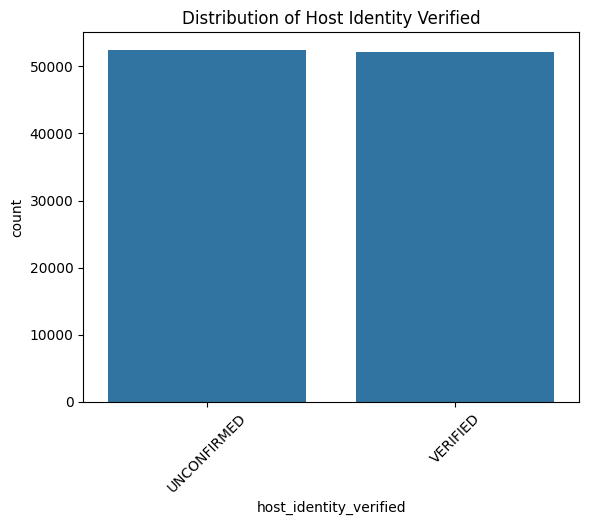

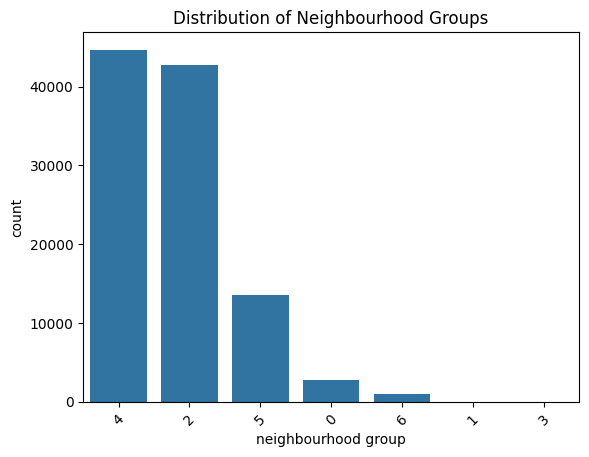

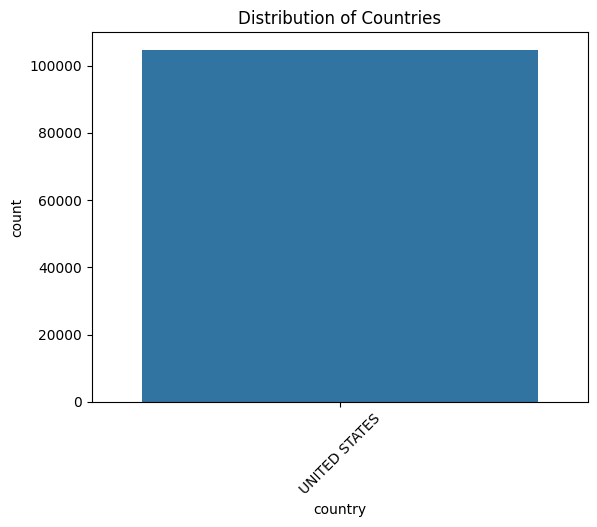

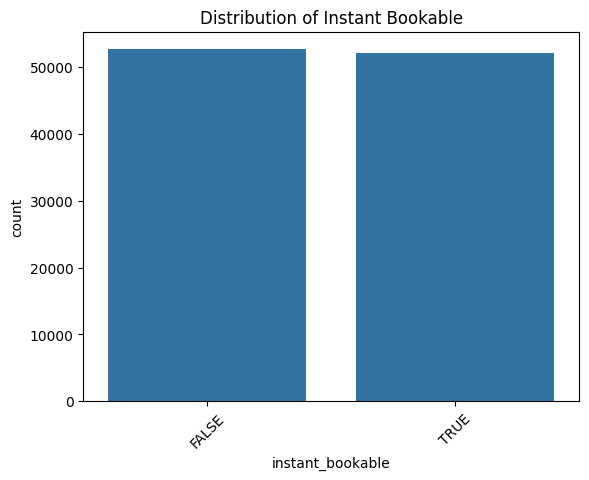

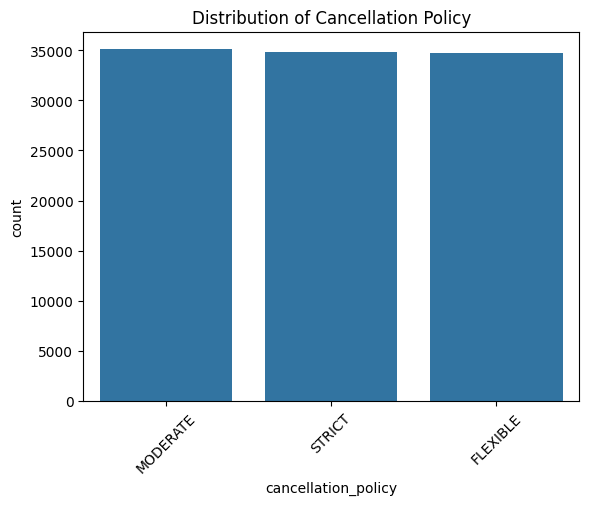

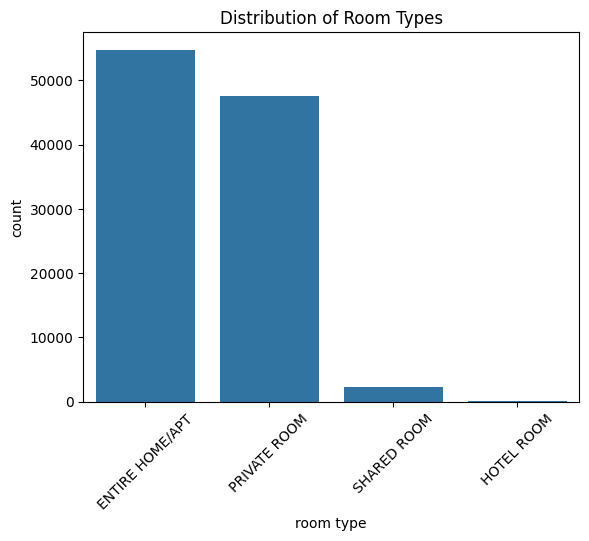

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='host_identity_verified', order=df['host_identity_verified'].value_counts().index)
plt.title("Distribution of Host Identity Verified")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index)
plt.title("Distribution of Neighbourhood Groups")
plt.xticks(rotation=45)
plt.show()


sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title("Distribution of Countries")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='instant_bookable', order=df['instant_bookable'].value_counts().index)
plt.title("Distribution of Instant Bookable")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='cancellation_policy', order=df['cancellation_policy'].value_counts().index)
plt.title("Distribution of Cancellation Policy")   
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='room type', order=df['room type'].value_counts().index)
plt.title("Distribution of Room Types")
plt.xticks(rotation=45)
plt.show()


5

In [60]:
df.to_csv("cleaned_listings_airbnb.csv", index=False)

PART-E

1

these were the following challanges:
->To convert "service fee" into consistent data type. Then i create a function with reg_ex that identifies the distinct patterns in the column and then i just removed those patterns and convert them into a single consistnent format.
->How should i check whether the data is mixed  (num + string ), Then i used (df[column_name].apply(lambda x: type(x)).value_counts()), it basically replaces the value with its data type and counts the values of those data types. So it tells me what data types are mixed in object data type
->while removing near-duplicate Airbnb listings using fuzzy matching.


2
each transformation has its own contrbutions to improve the quality of dataset but these improves alot 
->missing values handling because there were alot of missing values which can be shown via stats
->then outliers handling for minimum nights because it has a lrage number of outliers and would have affected the model very badly.


3
We have almost done feature transformation phase.
As we would be modelling it later so we would do:
->feature selection 
->feature extraction

Bonus